# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) #   设置默认的绘图大小
plt.rcParams['image.interpolation'] = 'nearest'# 最近邻差值: 像素为正方形
plt.rcParams['image.cmap'] = 'gray'#设置使用灰度输出

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2 #自动重载更改后的模块

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # 以第一行作为列索引
imgs = data[0::,1::]
labels = data[::,0]
print(imgs.shape)
print(labels.shape)

(42000, 784)
(42000,)


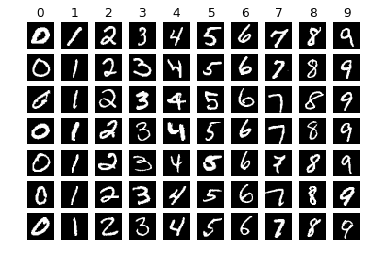

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10) #类别列表
num_classes = len(classes)#类别数目
samples_per_class = 7 # 每个类别采样个数
for y, cls in enumerate(classes):# 对列表的元素位置和元素进行循环，y表示元素位置（0,num_class），cls为元素本身
    idxs = np.flatnonzero(labels == y) #找出标签中y类的位置
    idxs = np.random.choice(idxs, samples_per_class, replace=False)#从中选出我们所需的7个样本
    for i, idx in enumerate(idxs):#对所选的样本的位置和样本所对应的图片在训练集中的位置进行循环
        plt_idx = i * num_classes + y + 1  # 在子图中所占位置的计算
        plt.subplot(samples_per_class, num_classes, plt_idx)# 说明要画的子图的编号
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8')) #画图
        plt.axis('off')#不显示坐标尺寸
        if i == 0:
            plt.title(cls)#写上类别名
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
# transform the labels to binary
for i in range(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:int(split_index)]
y_train = labels[:int(split_index)]
X_test = imgs[int(split_index):]
y_test = labels[int(split_index):]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [5]:
X_train_feats =(X_train - np.mean(X_train)) / np.std(X_train) # 使用标准差做特征值
X_test_feats =(X_test - np.mean(X_test)) / np.std(X_test) 
#X_train_feats =X_train
#X_test_feats =X_test
#X_train_feats =(X_train-np.mean(X_train)) / (np.max(X_train)-np.min(X_train))
#X_test_feats =(X_train-np.mean(X_test)) / (np.max(X_test)-np.min(X_test))

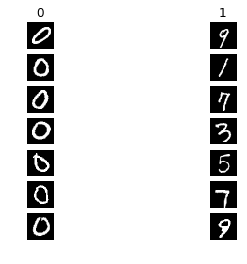

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.707923
iteration 100 / 500: loss 0.261771
iteration 200 / 500: loss 0.136522
iteration 300 / 500: loss 0.108610
iteration 400 / 500: loss 0.083803


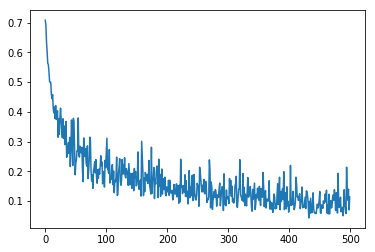

In [8]:
plt.plot(loss_history)

In [9]:
y_test_pred = classifier.predict(X_test_feats)
print("The accuracy socre is ", np.mean(y_test == y_test_pred))

The accuracy socre is  0.9753571428571428


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [10]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
#赋初值为0
TP = 0.0
FP = 0.0
FN = 0.0

#循环比较每个像素点的值
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 0:#如果测试集的预测值为0，真实值也为0，TP加1
        TP += 1.0

for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 1:#如果测试集的预测值为0，真实值为1，FP加1
        FP += 1.0

for it in range(785):
    if y_test_pred[it] == 1 and y_test[it] == 0:#如果测试集的预测值为1，真实值为0，FN加1
        FN += 1.0

#代公式计算精确度
precision = TP /(TP + FP)

#代公式计算召回率
recall = TP / (TP + FN)

print('precision:',precision)
print ('recall：',recall)
#print ('F1:', precision*recall*2/(precision+recall))
#代公式进行计算得出F1
print ('F1:', 2*TP/(2*TP+FP+FN))

precision: 1.0
recall： 0.7701149425287356
F1: 0.8701298701298701


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [11]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
#这一段跟上面第四段是一样的，就是把原始数据集重新分了一下，下面几个框子基本上都是重复上面的
split_index = len(labels) * 2 / 3
X_train = imgs[:int(split_index)]
y_train = labels[:int(split_index)]
X_test = imgs[int(split_index):]
y_test = labels[int(split_index):]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [12]:
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train) 
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test) 
#X_train_feats =X_train
#X_test_feats =X_test
#X_train_feats =(X_train-np.mean(X_train)) / (np.max(X_train)-np.min(X_train))
#X_test_feats =(X_train-np.mean(X_test)) / (np.max(X_test)-np.min(X_test))

In [13]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

it =  0
iteration 0 / 500: loss 0.707174
iteration 100 / 500: loss 0.147188
iteration 200 / 500: loss 0.108190
iteration 300 / 500: loss 0.162099
iteration 400 / 500: loss 0.067305
it =  1
iteration 0 / 500: loss 0.668834
iteration 100 / 500: loss 0.099246
iteration 200 / 500: loss 0.153311
iteration 300 / 500: loss 0.108136
iteration 400 / 500: loss 0.107141
it =  2
iteration 0 / 500: loss 0.670733
iteration 100 / 500: loss 0.316591
iteration 200 / 500: loss 0.234146
iteration 300 / 500: loss 0.109895
iteration 400 / 500: loss 0.208945
it =  3
iteration 0 / 500: loss 0.679046
iteration 100 / 500: loss 0.364039
iteration 200 / 500: loss 0.208225
iteration 300 / 500: loss 0.242707
iteration 400 / 500: loss 0.137693
it =  4
iteration 0 / 500: loss 0.706868
iteration 100 / 500: loss 0.250712
iteration 200 / 500: loss 0.180796
iteration 300 / 500: loss 0.191995
iteration 400 / 500: loss 0.127002
it =  5
iteration 0 / 500: loss 0.660112
iteration 100 / 500: loss 0.296928
iteration 200 / 500

In [14]:
# you may change your code in function `predict`
y_test_pred = classifier.one_vs_all_predict(X_test_feats)
print ("The accruacy socre is ", np.mean(y_test == y_test_pred))

The accruacy socre is  0.8333571428571429
